In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import FinanceDataReader as fdr

In [35]:
plt.rc("font", family="Malgun Gothic")

In [11]:
#005930
samsung = fdr.DataReader("005930")

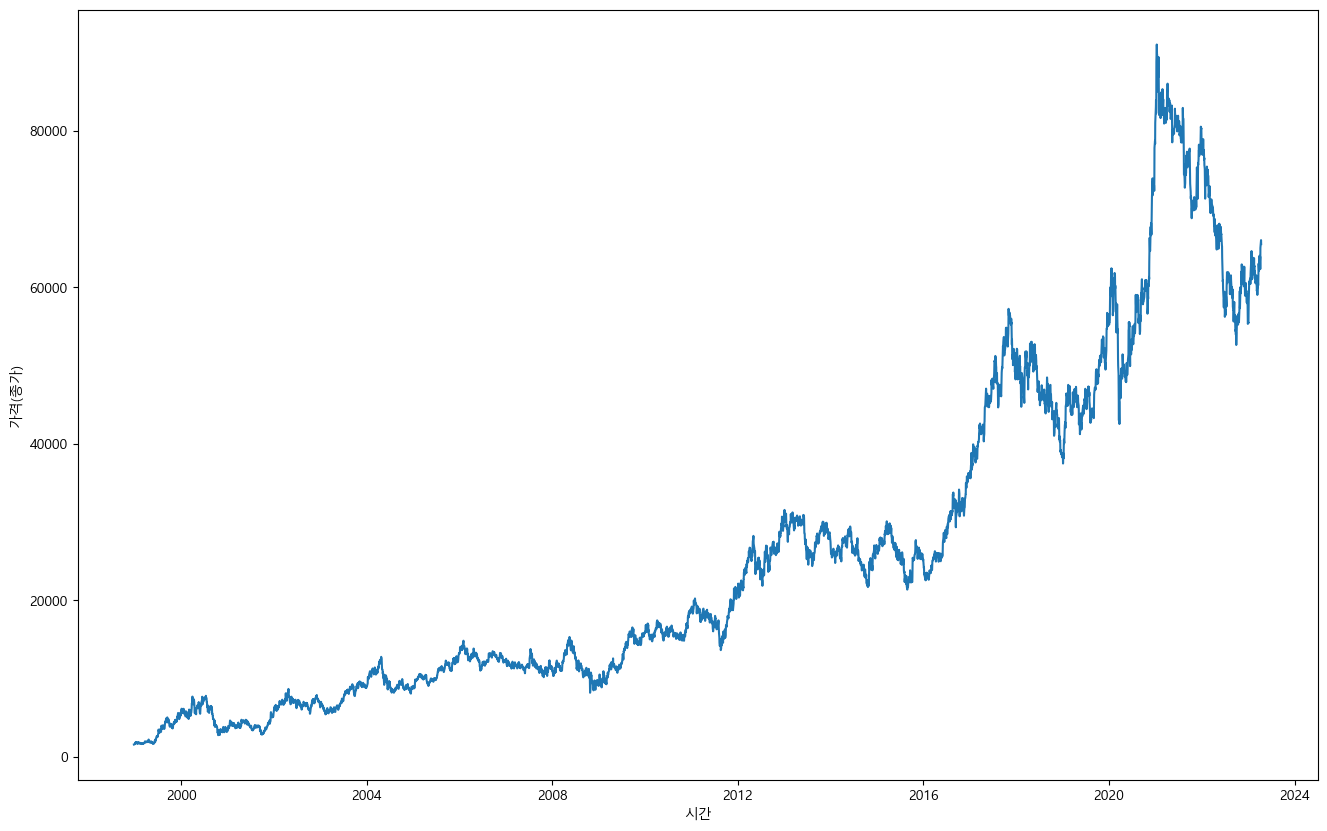

In [14]:
plt.figure(figsize=(16,10))
sns.lineplot(x = samsung.index, y = "Close", data = samsung)
plt.xlabel("시간")
plt.ylabel("가격(종가)")
plt.show()

In [22]:
def show_ts(df):
    plt.figure(figsize=(13,5))
    sns.lineplot(x = df.index, y = "Close", data = df)
    plt.xlabel("시간")
    plt.ylabel("가격(종가)")
    plt.show()

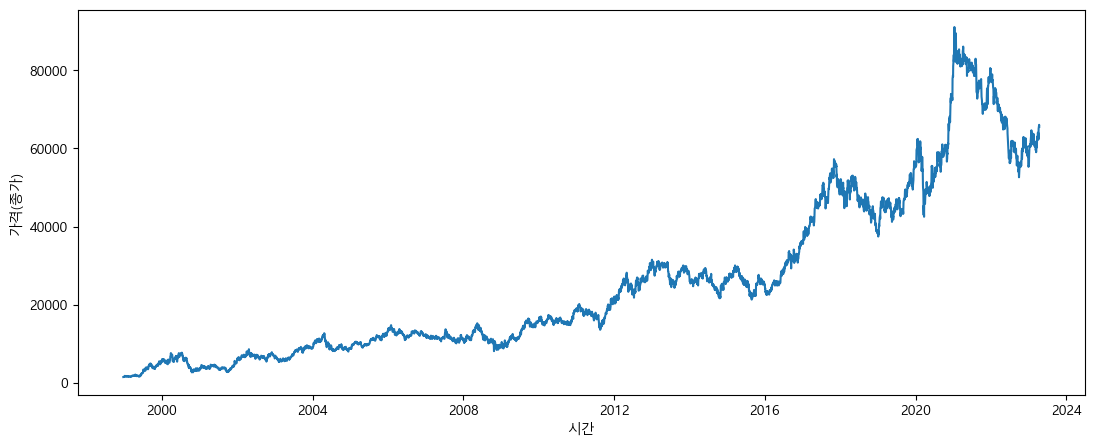

In [23]:
show_ts(samsung)

In [25]:
time_steps = [["1990", "2000"],
              ["2000", "2010"],
              ["2010", "2015"],
              ["2015", "2020"],
              ["2020", "2022"]]

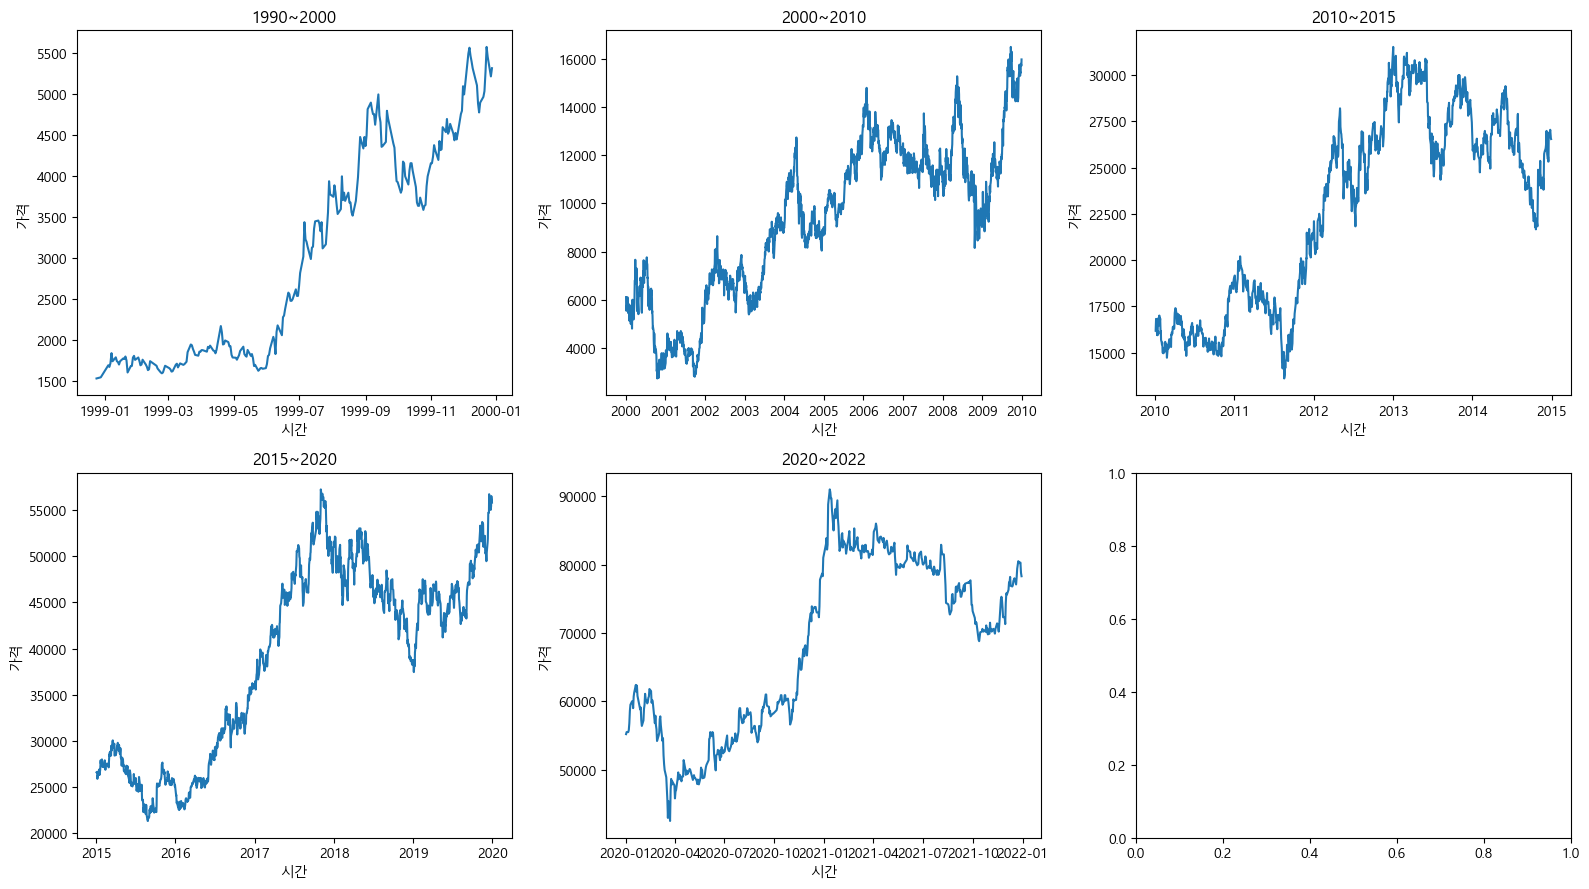

In [33]:
fig, axes = plt.subplots(2, 3)
fig.set_size_inches(16, 9)
for i in range(5):
    # 그래프 나눠서 그리기
    ax = axes[i // 3, i % 3]
    df = samsung.loc[(samsung.index > time_steps[i][0]) & (samsung.index < time_steps[i][1])]
    sns.lineplot(x = df.index, y = df["Close"], ax = ax)
    ax.set_title(f"{time_steps[i][0]}~{time_steps[i][1]}")
    ax.set_xlabel("시간")
    ax.set_ylabel("가격")
plt.tight_layout()
plt.show()

In [10]:
# 애플
fdr.DataReader("AAPL", "2022")

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,180.683868,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,178.390701,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,173.645538,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.746811,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.915573,86709100
...,...,...,...,...,...,...
2023-04-05,164.740005,165.050003,161.800003,163.759995,163.759995,51511700
2023-04-06,162.429993,164.960007,162.000000,164.660004,164.660004,45390100
2023-04-10,161.419998,162.029999,160.080002,162.029999,162.029999,47716900


In [8]:
# 비트코인
fdr.DataReader("BTC/KRW", "2022")

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-01,55059108.0,56860932.0,55031456.0,56693896.0,56693896.0,29225841148116
2022-01-02,56686900.0,56925248.0,55707276.0,56288032.0,56288032.0,33231206401082
2022-01-03,56286036.0,56681504.0,54817388.0,55549032.0,55549032.0,39543078679445
2022-01-04,55549912.0,56748504.0,54802988.0,54962304.0,54962304.0,50887335571155
2022-01-05,54964436.0,56202344.0,51356056.0,52293708.0,52293708.0,44230523372262
...,...,...,...,...,...,...
2023-04-09,36752828.0,37067896.0,36703960.0,36791596.0,36791596.0,12339328544076
2023-04-10,36797616.0,37585124.0,36634528.0,37299024.0,37299024.0,16028194560346
2023-04-11,37302944.0,39329012.0,37288424.0,39178424.0,39178424.0,25476497701686


In [6]:
from prophet import Prophet
# 각각 전체와 컴퍼넌트별로 보는 코드
from prophet.plot import plot_plotly, plot_components_plotly
# fbprophet은 옛날 코드라 안통함

+ y 컬럼과 ds 컬럼이 존재해야 함

In [11]:
# 데이터 가공 (시계열은 NA값을 날리면 안된다.)
stock = fdr.DataReader("005930", "2022")
# y랑 ds는 꼭 만든다.
stock["y"] = stock["Close"]
stock["ds"] = stock.index
stock.head()

,Open,High,Low,Close,Volume,Change,y,ds
Date,,,,,,,,
2022-01-03,79400,79800,78200,78600,13502112,0.003831,78600,2022-01-03
2022-01-04,78800,79200,78300,78700,12427416,0.001272,78700,2022-01-04
2022-01-05,78800,79000,76400,77400,25470640,-0.016518,77400,2022-01-05
2022-01-06,76700,77600,76600,76900,12931954,-0.006460,76900,2022-01-06
2022-01-07,78100,78400,77400,78300,15163757,0.018205,78300,2022-01-07


In [12]:
# 원데이터(raw)를 fit시킨다.
m = Prophet()
m.fit(stock)

16:27:15 - cmdstanpy - INFO - Chain [1] start processing
16:27:15 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
# 예측 기간 설정(30일) - 보통은 길어야 7일임...
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
342,2023-05-09
343,2023-05-10
344,2023-05-11
345,2023-05-12
346,2023-05-13


In [19]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
342,2023-05-09,64072.079937,61436.576526,66144.859340,63922.218978,64202.084963,-170.170033,-170.170033,-170.170033,-170.170033,-170.170033,-170.170033,0.0,0.0,0.0,63901.909904
343,2023-05-10,64100.308690,61645.786699,66329.303481,63939.797883,64237.675412,-167.939246,-167.939246,-167.939246,-167.939246,-167.939246,-167.939246,0.0,0.0,0.0,63932.369444
344,2023-05-11,64128.537443,61586.927946,66233.735954,63958.305000,64273.058483,-217.837661,-217.837661,-217.837661,-217.837661,-217.837661,-217.837661,0.0,0.0,0.0,63910.699782
345,2023-05-12,64156.766196,61720.888552,66414.529800,63977.004395,64316.717673,-19.527359,-19.527359,-19.527359,-19.527359,-19.527359,-19.527359,0.0,0.0,0.0,64137.238837
346,2023-05-13,64184.994949,62227.949511,66747.724501,63996.844416,64348.392440,349.894022,349.894022,349.894022,349.894022,349.894022,349.894022,0.0,0.0,0.0,64534.888971


In [18]:
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].iloc[-40:-20]

,ds,yhat,yhat_lower,yhat_upper
307,2023-03-31,62951.631210,60442.117865,65406.799176
308,2023-04-03,62931.531191,60310.223518,65225.944935
309,2023-04-04,62913.903549,60459.583391,65299.867086
310,2023-04-05,62944.363088,60537.699162,65343.877703
311,2023-04-06,62922.693426,60419.564405,65202.833768
312,2023-04-07,63149.232481,60671.401141,65295.191189
313,2023-04-10,63129.132462,60769.034669,65531.293819
314,2023-04-11,63111.504820,60692.013233,65553.456747
315,2023-04-12,63141.964359,60806.884238,65485.052681
316,2023-04-13,63120.294698,60684.383144,65377.244729


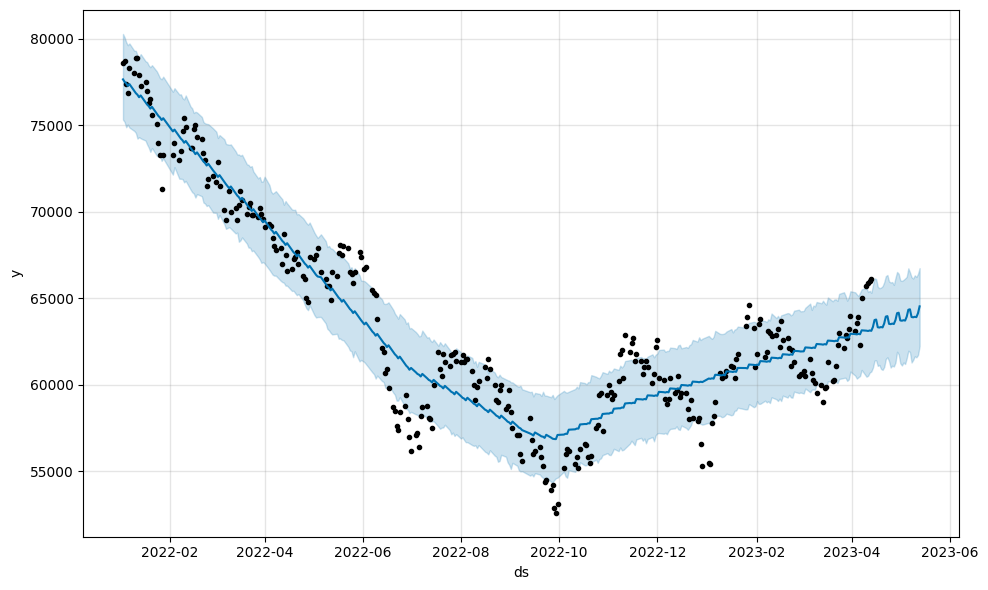

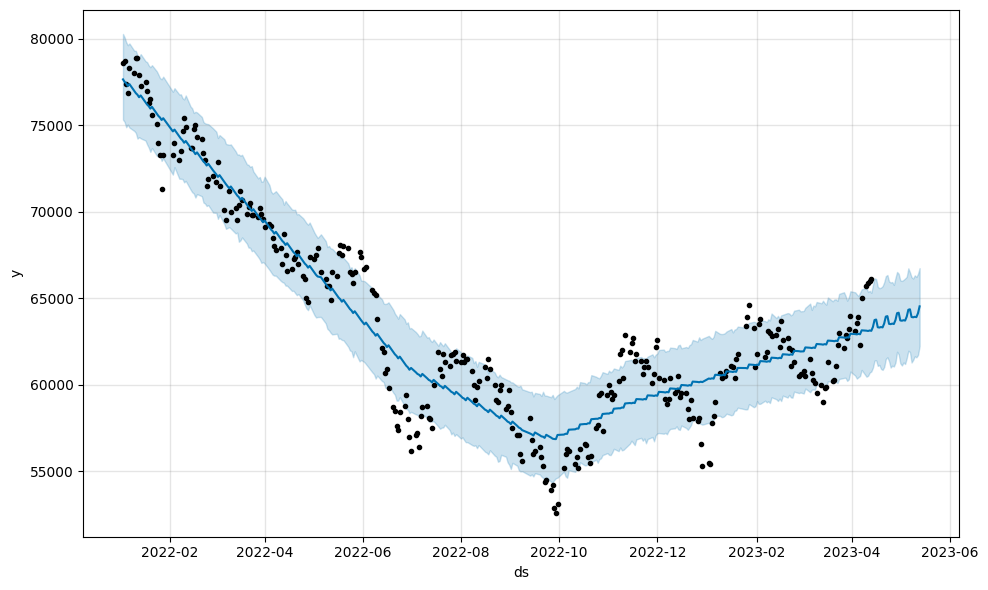

In [20]:
m.plot(forecast)

In [28]:
# 전체 경향성을 보고 들어가자.
# 이왕이면 plotly 사용하기
fig = plot_plotly(m ,forecast)
fig

In [24]:
# 세부 컴포넌트를 이용해서 확인
plot_components_plotly(m, forecast)

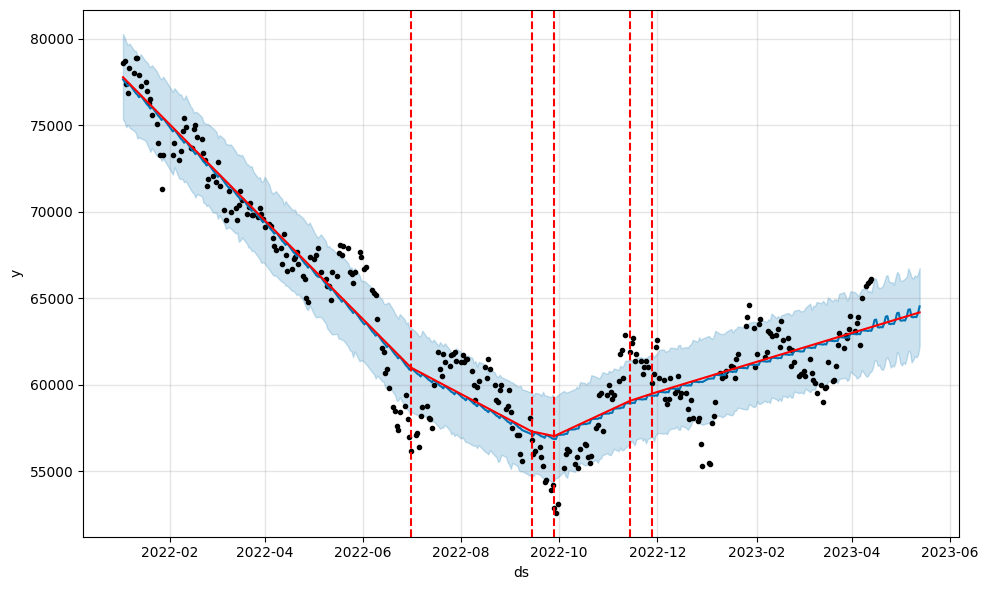

In [29]:
# 변경점을 확인!
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

16:57:14 - cmdstanpy - INFO - Chain [1] start processing
16:57:14 - cmdstanpy - INFO - Chain [1] done processing


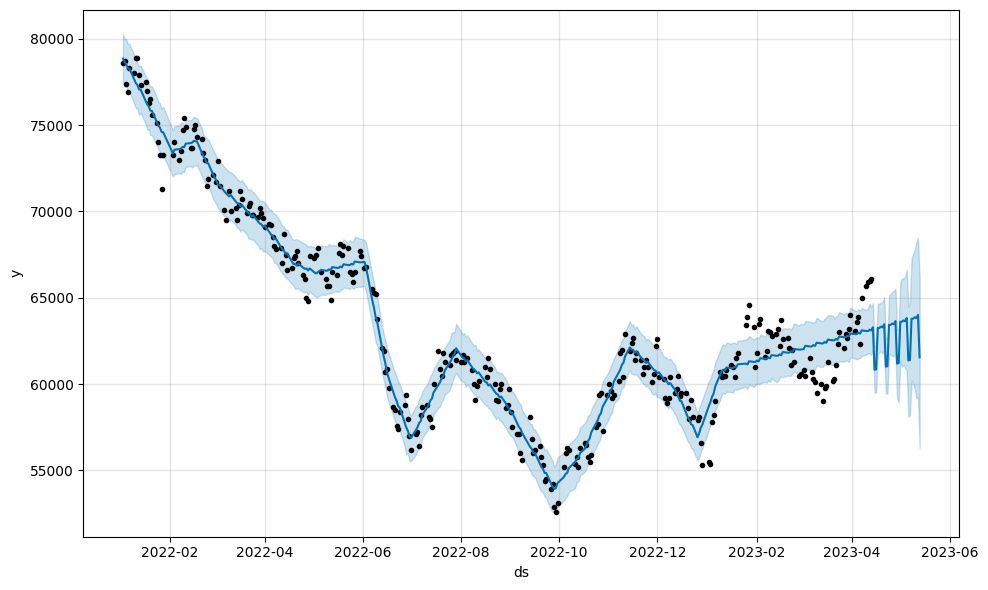

In [30]:
# 유연성 => 계수가 낮으면 과소적합, 높으면 과대적합 => 하이퍼(사람이 조작)
m = Prophet(changepoint_prior_scale=0.8)
forecast = m.fit(stock).predict(future)
fig = m.plot(forecast)


In [32]:
# 서울시 코로나 확진자 발표
covid19 = pd.read_csv("../data/seoul_covid19.csv")
covid19

C:\Users\SW\AppData\Local\Temp\ipykernel_3552\1418310226.py:2: DtypeWarning:

Columns (4,10) have mixed types. Specify dtype option on import or set low_memory=False.



,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,182558,2021-12-11,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
1,182557,2021-12-11,NaN,NaN,NaN,성북구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
2,182556,2021-12-11,NaN,NaN,NaN,중구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
3,182555,2021-12-11,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
4,182554,2021-12-11,NaN,NaN,NaN,광진구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182553,5,2020-01-31,9.0,NaN,650909-1,성북구,NaN,기타 확진자 접촉,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
182554,4,2020-01-30,7.0,NaN,561220-1,마포구,중국,해외유입,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
182555,3,2020-01-30,6.0,NaN,810212-1,종로구,NaN,종로구 집단발병,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
182556,2,2020-01-30,5.0,NaN,400415-1,중랑구,중국,해외유입,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y


<Axes: xlabel='확진일'>

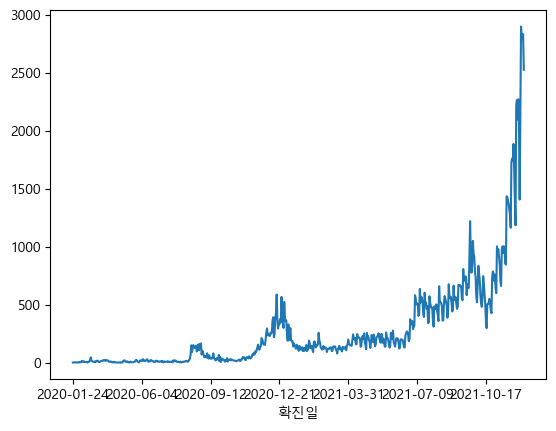

In [36]:
covid19.groupby("확진일")["연번"].count().plot()

<Axes: xlabel='확진일'>

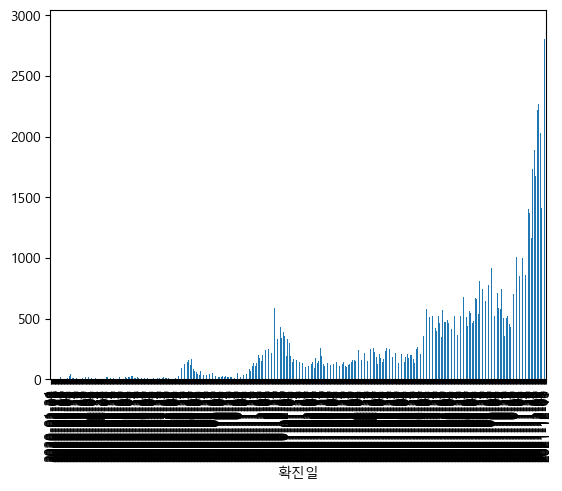

In [37]:
covid19.groupby("확진일")["연번"].count().plot(kind="bar")

In [41]:
# covid19["지역"].unique()
# 양 옆의 공백을 제거
covid19["지역"] = covid19["지역"].apply(lambda x: x.strip())

In [42]:
# 항목이 제대로 바뀌었는지 확인
covid19.loc[covid19["지역"] == "관악구 "]

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부


In [44]:
# 구를 concat하는 코드
target = ["동대문", "서대문", "송파", "영등포"]
covid19["지역"] = covid19["지역"].apply(lambda x: x + "구" if x in target else x)

In [45]:
# 항목이 제대로 바뀌었는지 확인
covid19["지역"].unique()

array(['기타', '성북구', '중구', '광진구', '종로구', '중랑구', '강동구', '강북구', '노원구',
       '서대문구', '금천구', '송파구', '은평구', '성동구', '동작구', '양천구', '관악구', '구로구',
       '용산구', '강남구', '도봉구', '동대문구', '서초구', '강서구', '마포구', '영등포구', '타시도'],
      dtype=object)

In [48]:
# 원하는 데이터를 groupby로 가져오는 코드
covid19_df = covid19.groupby("확진일")["연번"].count().reset_index()
covid19_df

,확진일,연번
0,2020-01-24,1
1,2020-01-30,3
2,2020-01-31,3
3,2020-02-02,1
4,2020-02-05,2
...,...,...
651,2021-12-07,2901
652,2021-12-08,2790
653,2021-12-09,2800
654,2021-12-10,2835


In [70]:
covid19_df.columns = ["ds", "y"]
covid19_df

,ds,y
0,2020-01-24,1
1,2020-01-30,3
2,2020-01-31,3
3,2020-02-02,1
4,2020-02-05,2
...,...,...
651,2021-12-07,2901
652,2021-12-08,2790
653,2021-12-09,2800
654,2021-12-10,2835


In [71]:
from prophet import Prophet
m = Prophet()

In [72]:
future = m.make_future_dataframe(periods=30)


Exception: Model has not been fit.

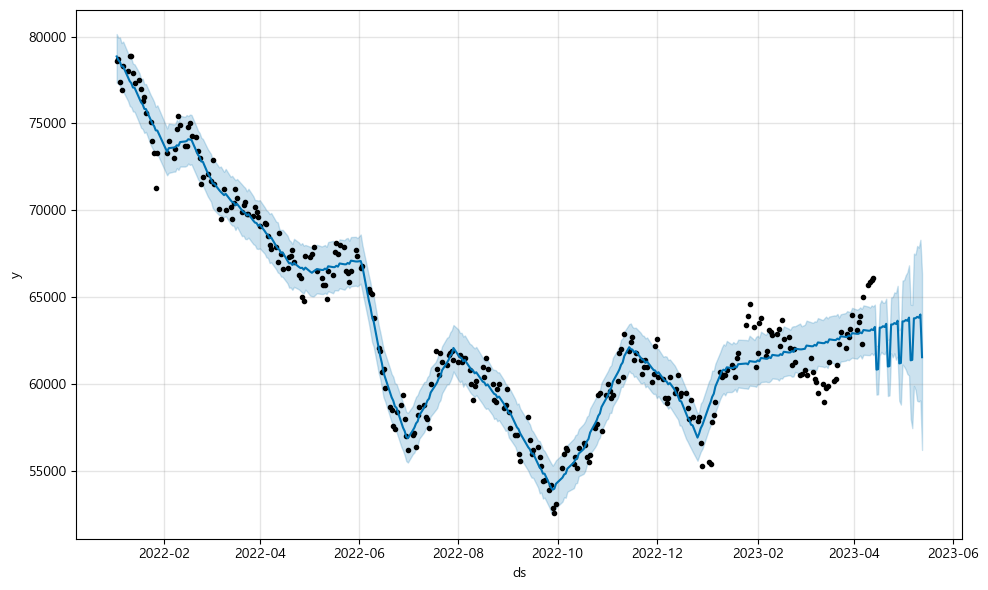

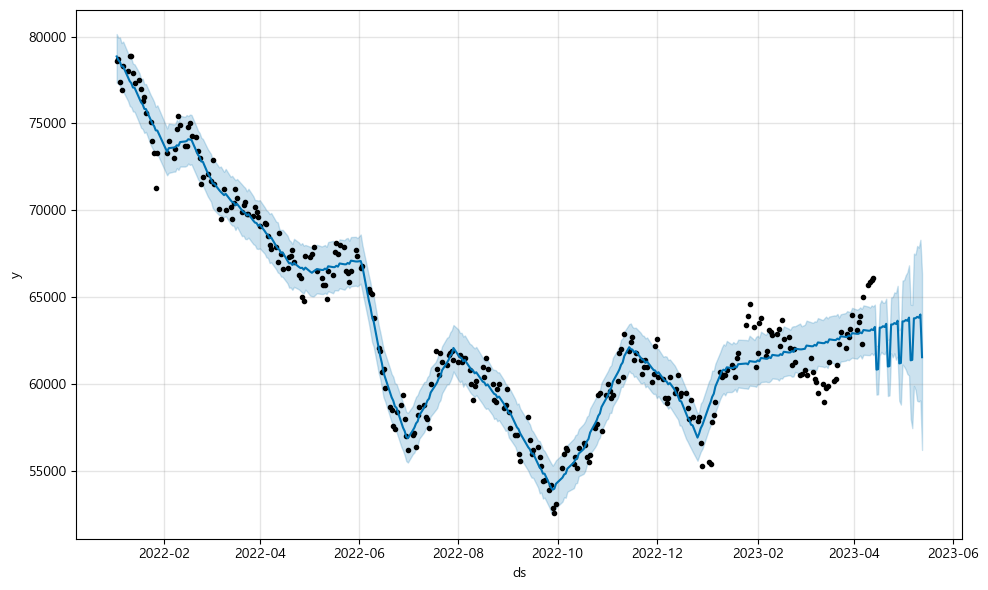

In [56]:
forecast = m.predict(future)
m.plot(forecast)

NameError: name 'add_changepoints_to_plotplot' is not defined

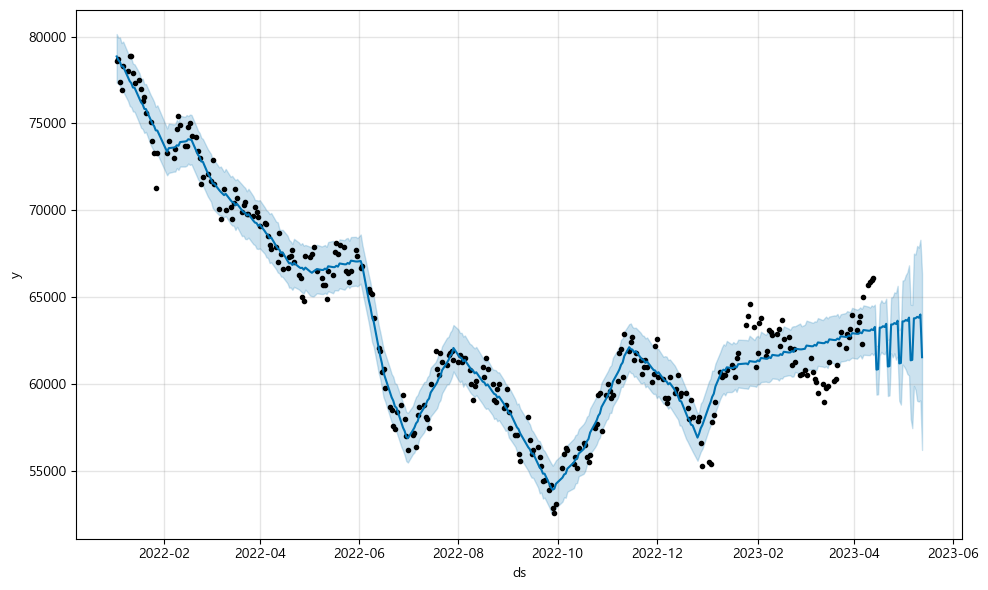

In [63]:
fig = m.plot(forecast)
a = add_changepoints_to_plotplot(fig.gcd(), m, forecast)